In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes (2).csv


{'diabetes (2).csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.25

In [81]:
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [82]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### The diabetes dataset consists of 768 data points, with 9 features each

In [83]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


### Outcome 0 means No diabetes, outcome 1 means diabetes
Of these 768 data points, 500 are labeled as 0 and 268 as 1:

In [84]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [85]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [86]:
diabetes.isnull().sum()
diabetes.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**Unexpected Outliers**

When analyzing the histogram we can identify that there are some outliers in some columns. We will further analyze those outliers and determine what we can do about them.

In [87]:
diabetes_mod = diabetes.copy(deep = True)
diabetes_mod [['Glucose', 'BloodPressure', 'SkinThickness', 'BMI','Insulin']] = diabetes_mod [['Glucose', 'BloodPressure', 'SkinThickness', 'BMI','Insulin']].replace(0, np.NaN)
print(diabetes_mod.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


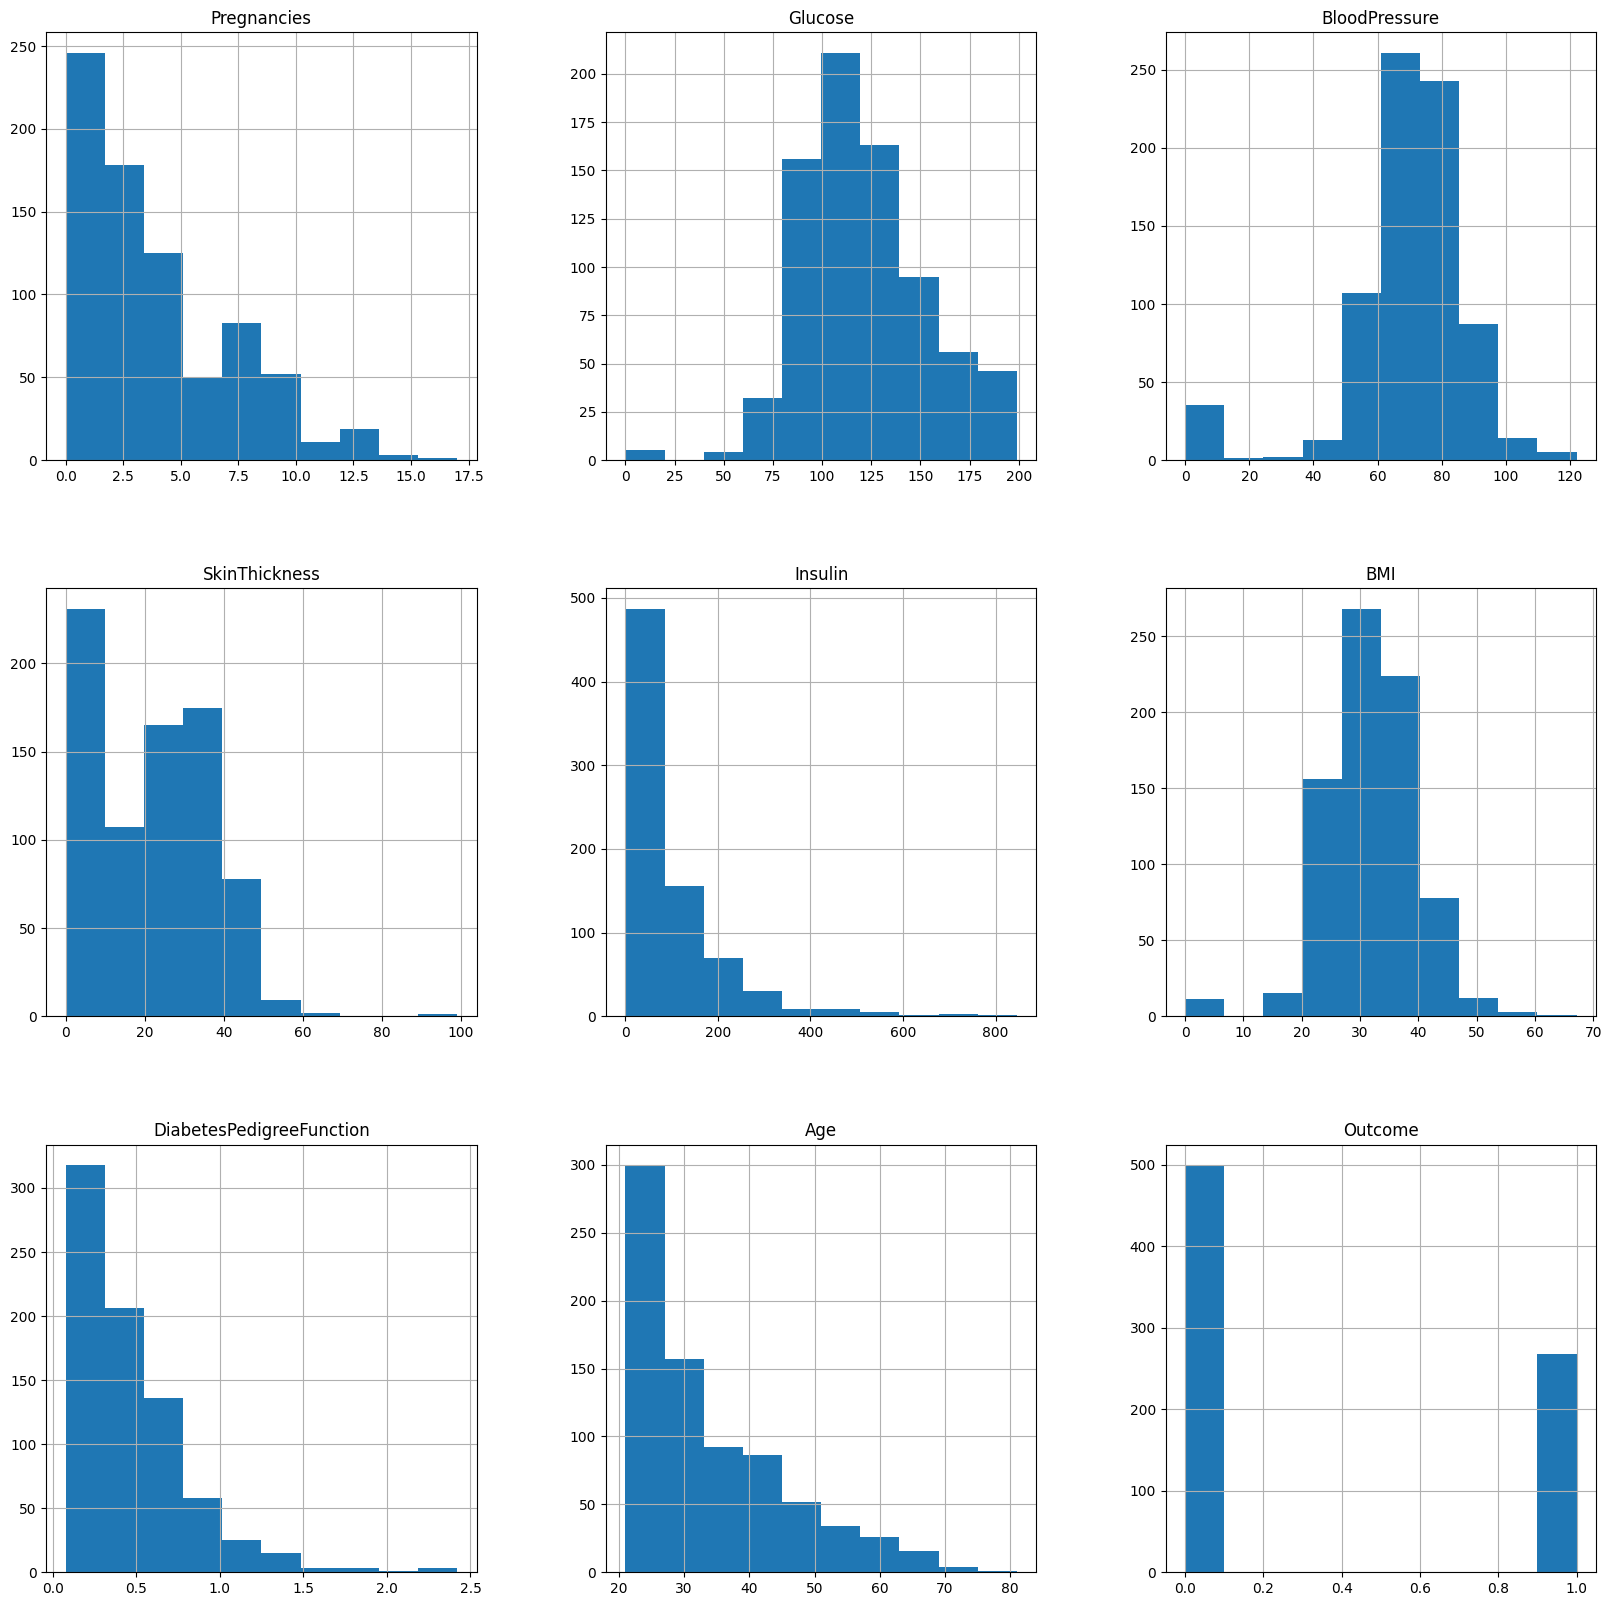

In [88]:
p = diabetes.hist(figsize = (20,20))

Here are several ways to handle invalid data values :

**Ignore/remove these cases**: This is not actually possible in most cases because that would mean losing valuable information. And in this case “skin thickness” and “insulin” columns mean to have a lot of invalid points. But it might work for “BMI”, “glucose ”and “blood pressure” data points.

**Put average/mean values:** This might work for some data sets, but in our case putting a mean value to the blood pressure column would send a wrong signal to the model.

**Avoid using features**: It is possible to not use the features with a lot of invalid values for the model. This may work for “skin thickness” but it's hard to predict that.

In [89]:
diabetes_mod['Glucose'].fillna(diabetes_mod['Glucose'].mean(),inplace=True)
diabetes_mod['BloodPressure'].fillna(diabetes_mod['BloodPressure'].mean(),inplace=True)
diabetes_mod['SkinThickness'].fillna(diabetes_mod['SkinThickness'].median(),inplace=True)
diabetes_mod['Insulin'].fillna(diabetes_mod['Insulin'].median(),inplace=True)
diabetes_mod['BMI'].fillna(diabetes_mod['BMI'].median(),inplace=True)


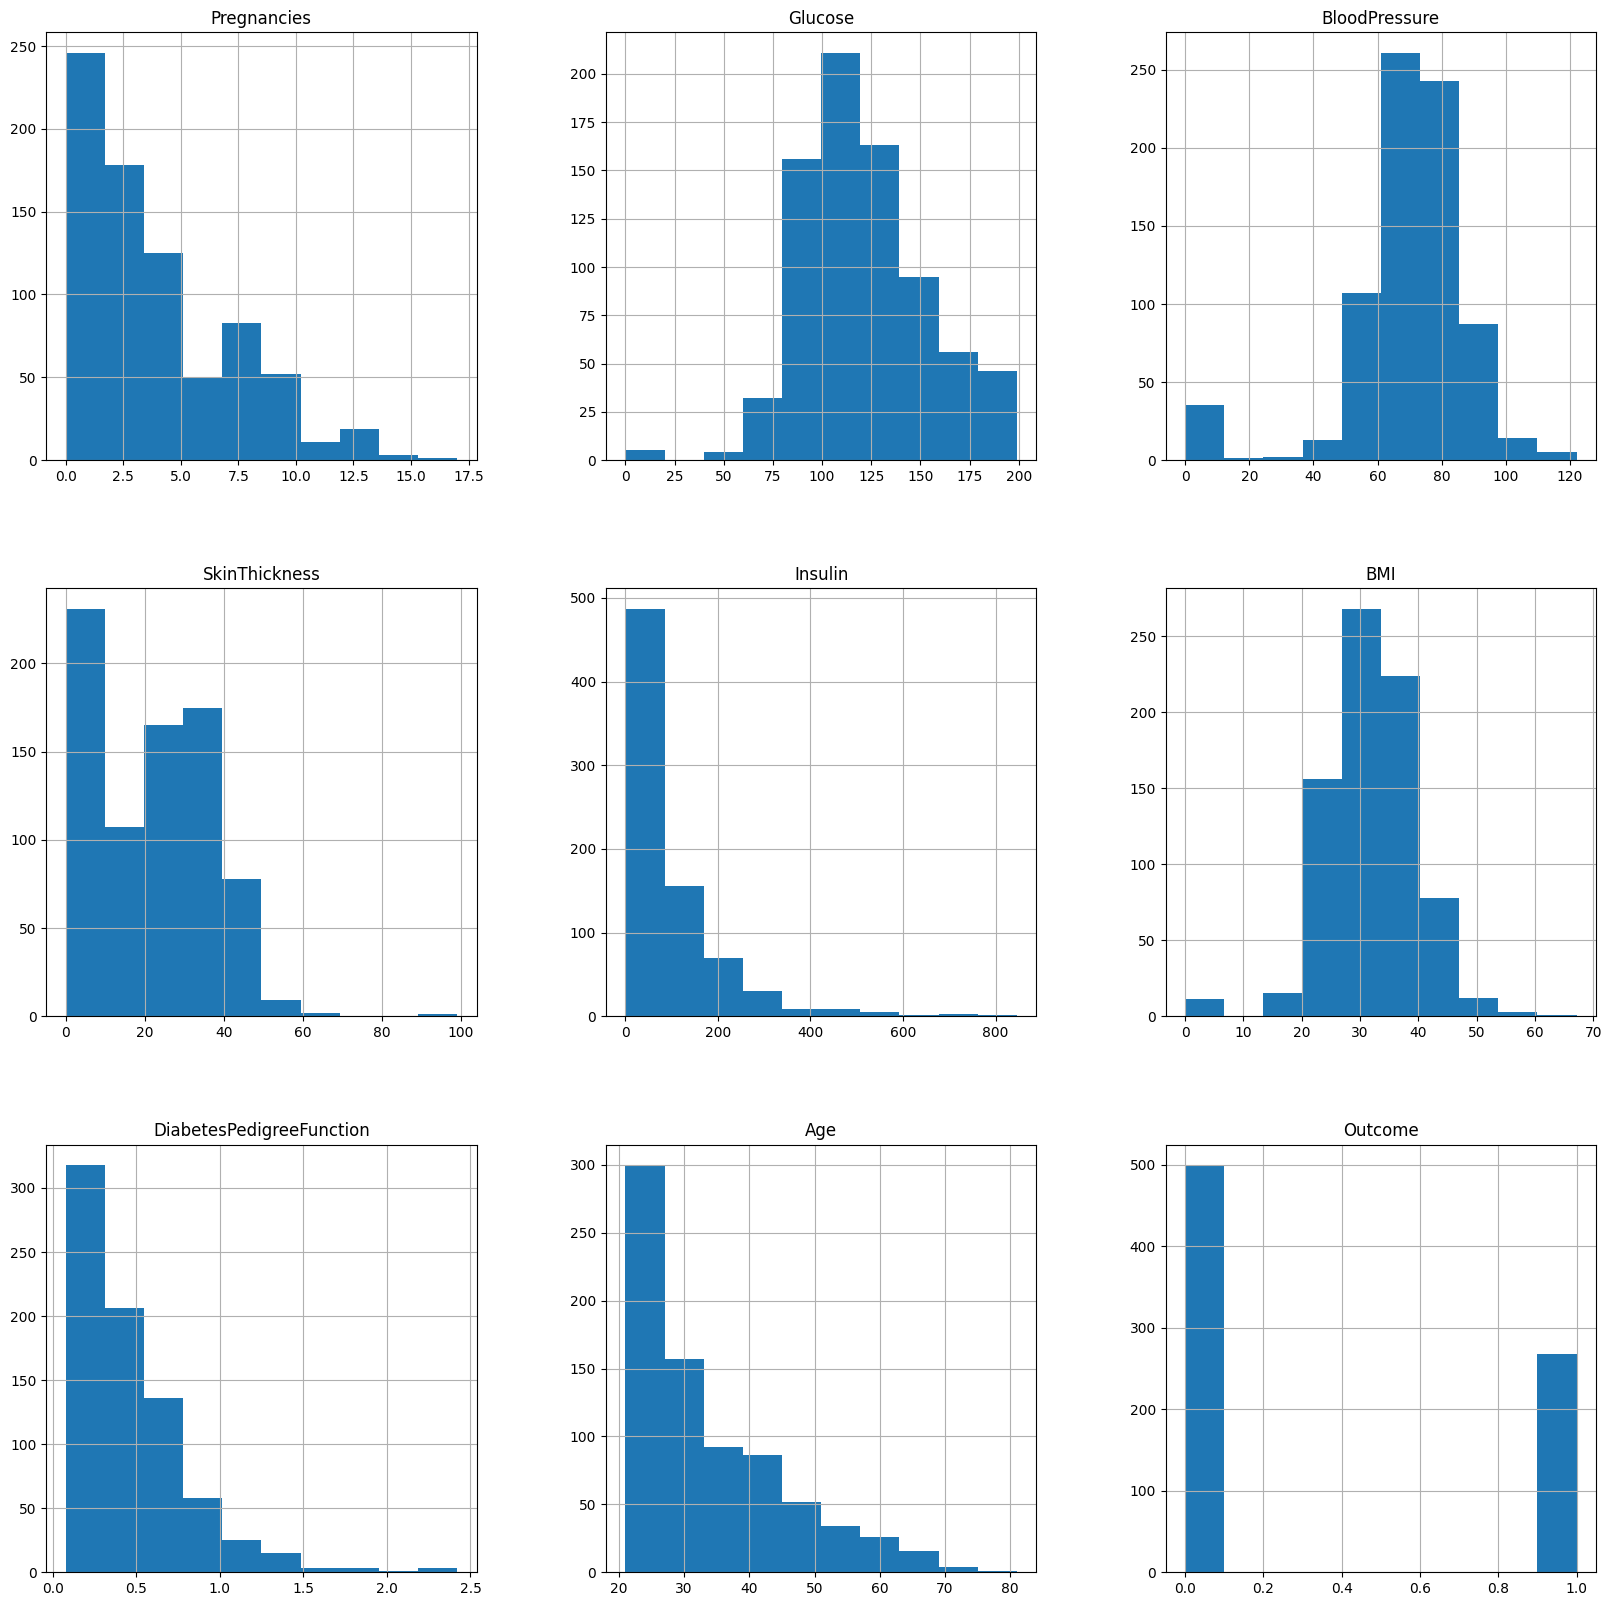

In [90]:
p = diabetes.hist(figsize = (20,20))

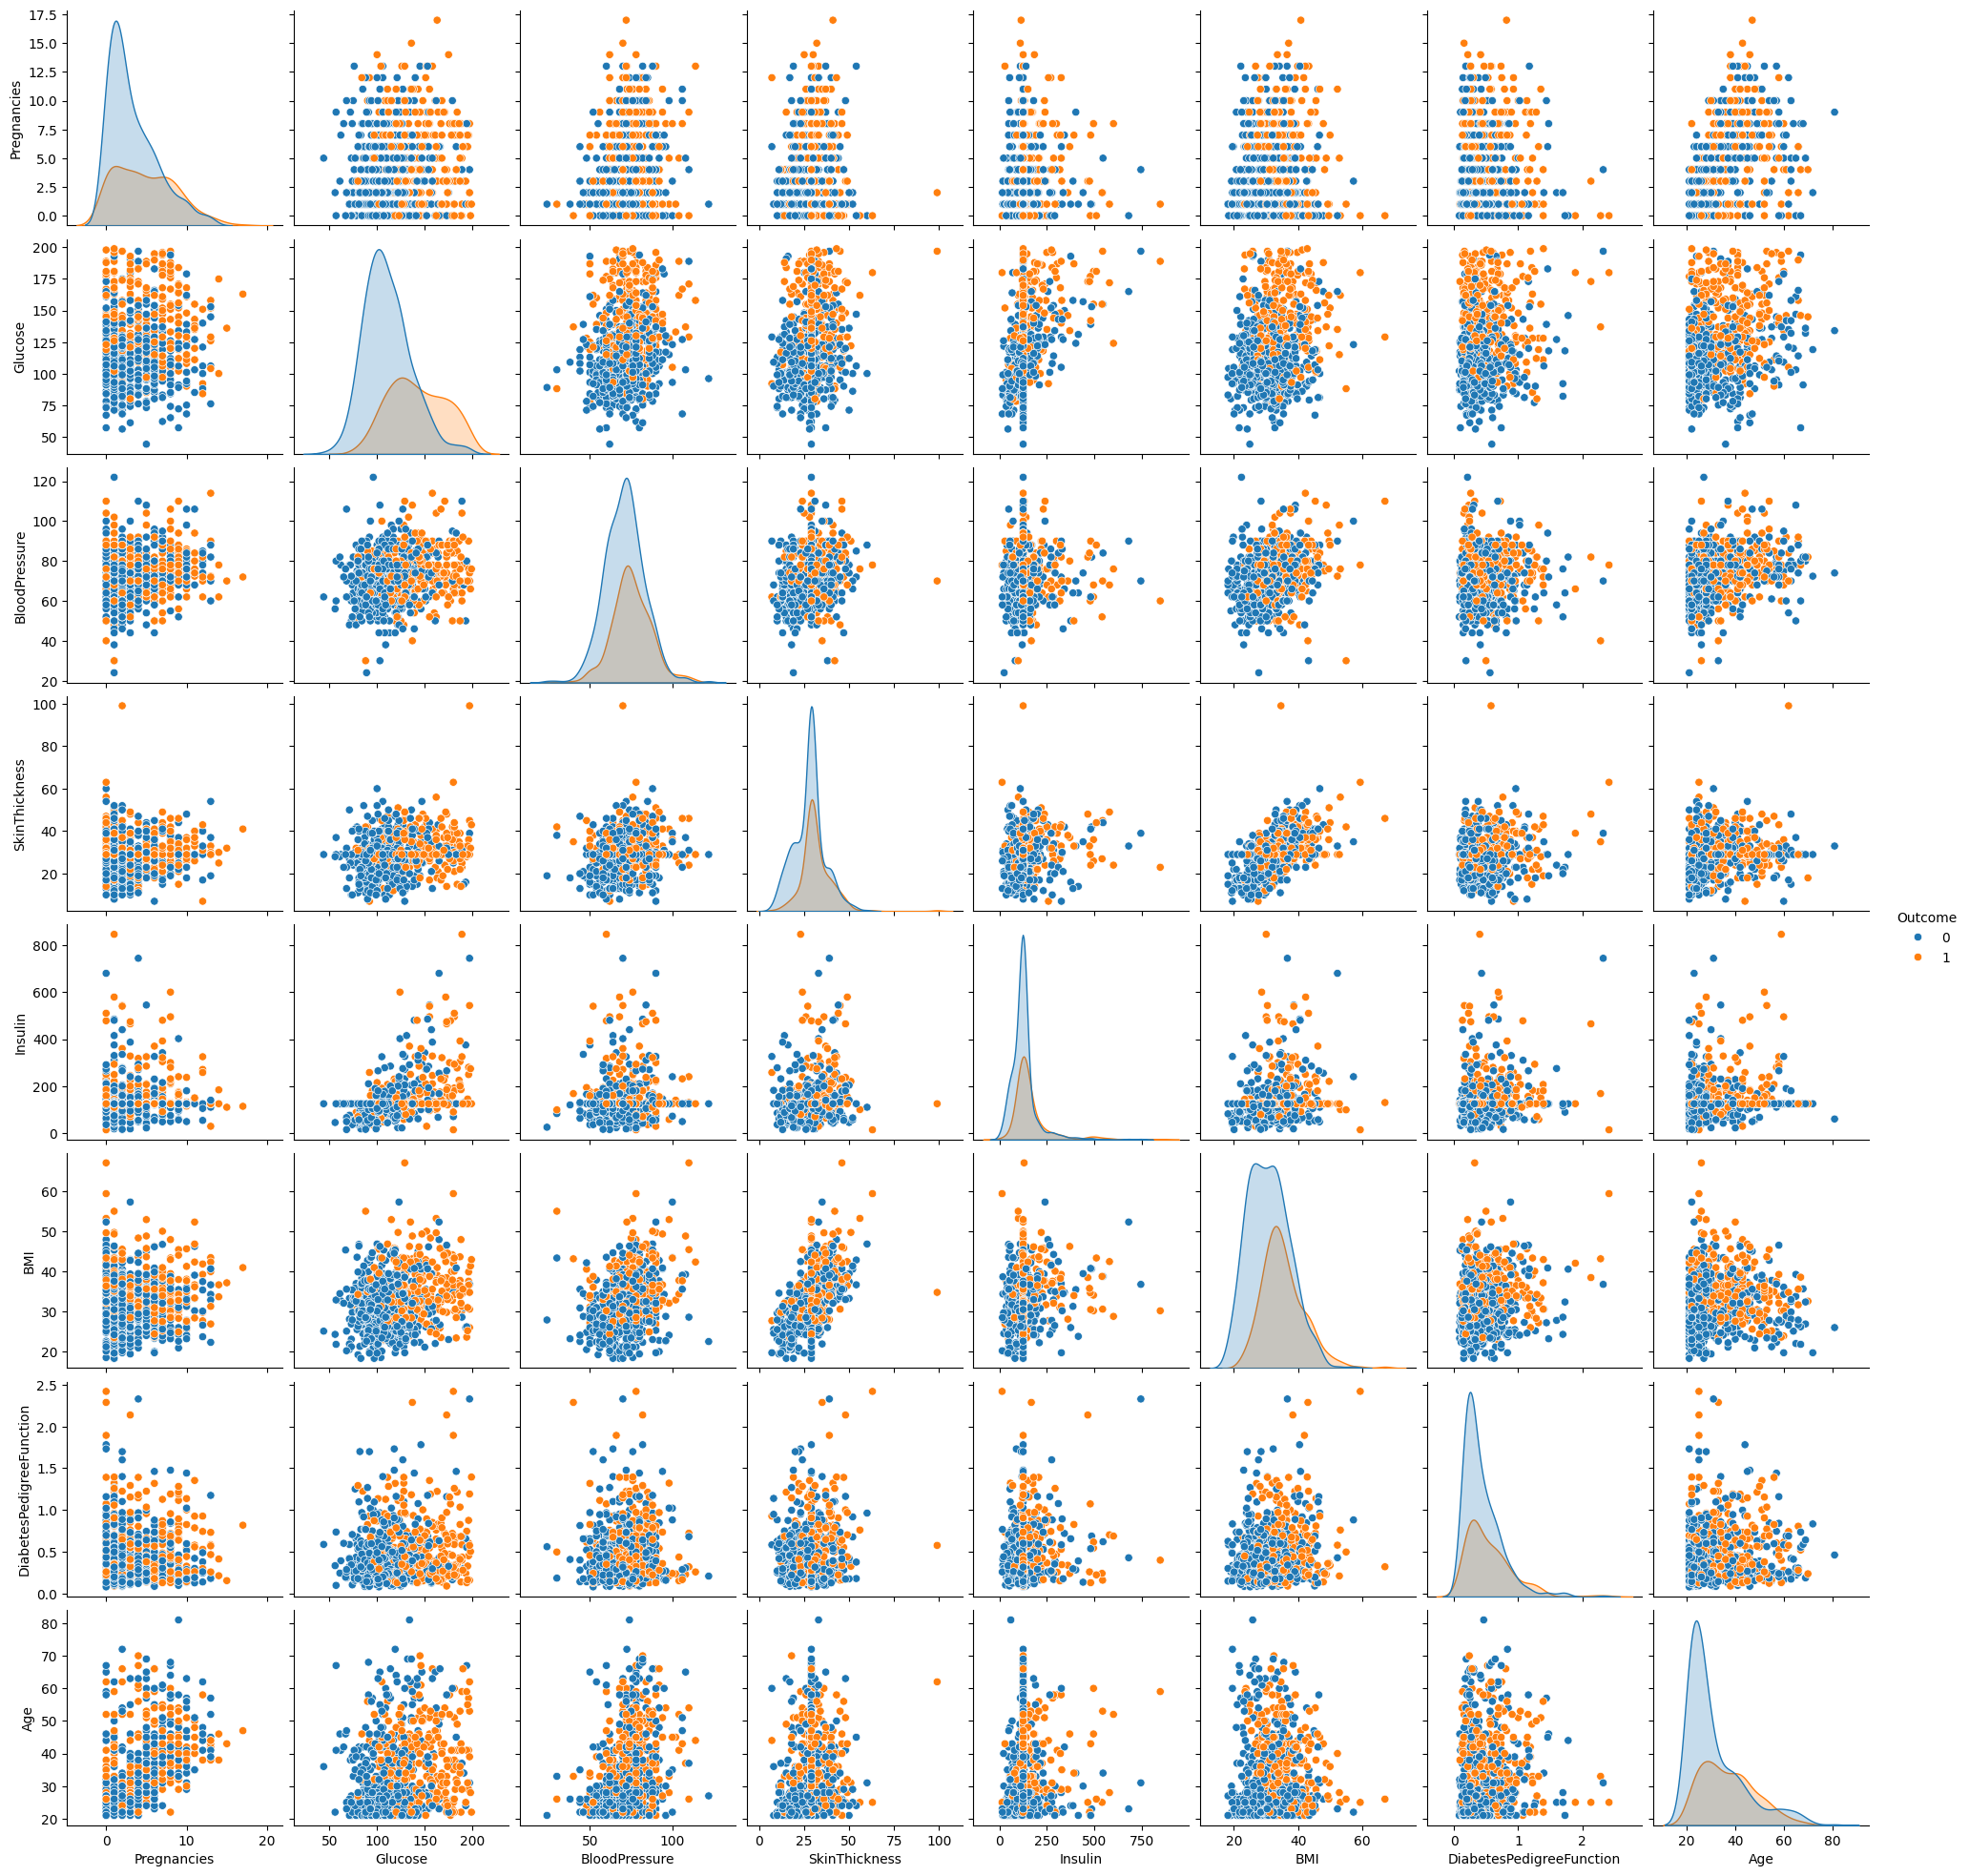

In [91]:
sns.pairplot(diabetes_mod, hue='Outcome')
#blue = no diabetes and orange = diabetes

In [92]:
print(diabetes_mod.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [93]:
diabetes_mod.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<Axes: >

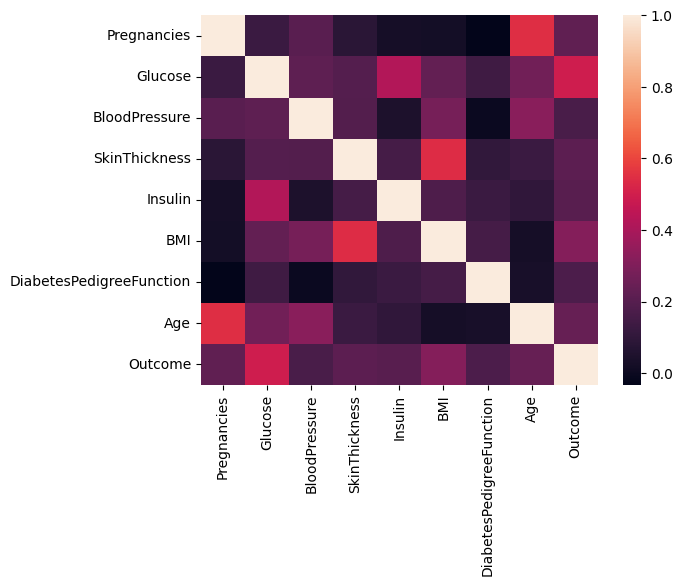

In [94]:
import seaborn as sns
sns.heatmap(diabetes_mod.corr())

In the above heatmap, brighter colors indicate more correlation. As we can see from the table and the heatmap, glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable. Also notice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.

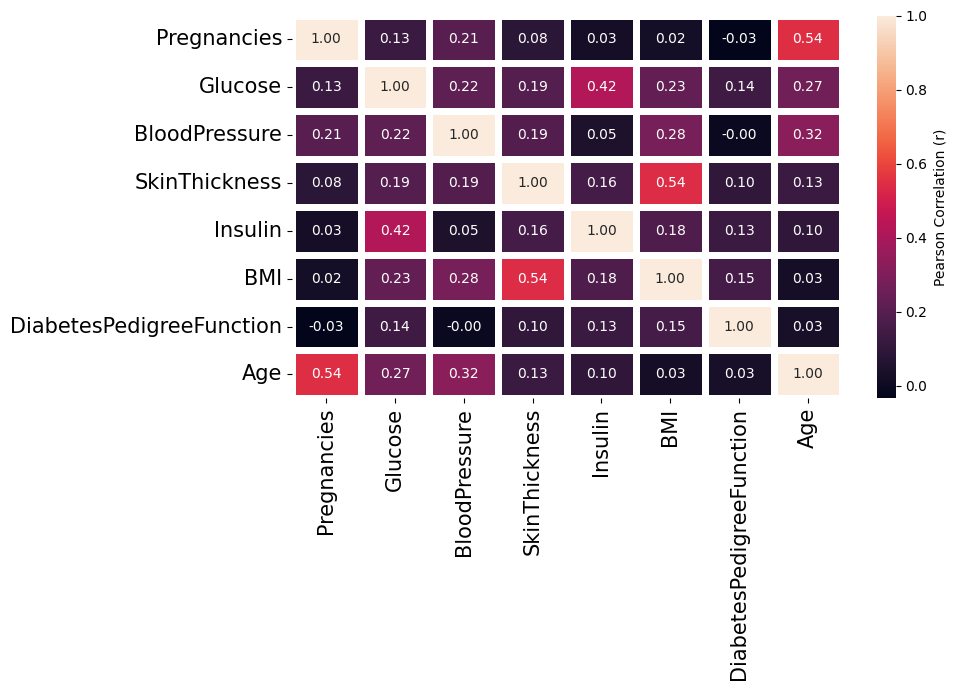

In [95]:
plt.figure(figsize=(10,7))
corr_mat = diabetes_mod.iloc[:,:-1].corr()
sns.heatmap(corr_mat, fmt='0.2f', annot=True, lw=5, cbar_kws={'label':'Pearson Correlation (r)'})
plt.xticks(size=15,rotation=90)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('Correlation.png',dpi=300);

**Phase 3— Feature Engineering**

Feature engineering is the process of transforming the gathered data into features that better represent the problem that we are trying to solve to the model, to improve its performance and accuracy.

Feature engineering enables us to highlight the important features and facilitate to bring domain expertise on the problem to the table. It also allows avoiding overfitting the model despite providing many input features”.

In [96]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome#

In [97]:

X = diabetes_mod.drop('Outcome',axis=1)
y = diabetes_mod['Outcome']

**Logistic Regression Model Fitting**

To apply Logistic Regression model to classify we will call the model using LogisticRegression () function.

First, we will train our dataset in Logistic Regression model on (X_train, y_train) and we will use (X_test, y_test) to evaluate the model generated.

Train Dataset: Used to fit the machine learning model.

Test Dataset: Used to evaluate the fit machine learning model.

We will build the Logistic Regression model and predict for X_test and compare prediction to the y_test.

In [98]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Let’s Train Our Model:**

In [100]:
logmodel = LogisticRegression()

In [101]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Let’s See How Our Model Labels: X_train Data To Make A Classification:**

In [102]:
y_pred = logmodel.predict(X_test)

In [103]:
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [104]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [105]:
y_test

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
355,1
534,0
344,0
296,1


You can see that using model.predict(X_test) function our model classified each column attribute (X-train) as 0/1 as a prediction

**score(X_train,Y_train) is measuring the accuracy of the model against the training data. (How well the model explains the data it was trained with**

In [106]:
# calculate accuracy#
print("Training set accuracy: {:.3f}".format(logmodel.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logmodel.score(X_test, y_test)))

Training set accuracy: 0.772
Test set accuracy: 0.773


In [107]:

from sklearn.metrics import confusion_matrix, classification_report


In [108]:
confusion_matrix(y_test,y_pred)

array([[83, 16],
       [19, 36]])

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct

In [110]:
print("Mean squared error: %.2f\n"
      % mean_squared_error(y_test, y_pred))


Mean squared error: 0.23



In [111]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

#ROC AUC score calculation
logit_roc_auc =roc_auc_score(y_test,logmodel.predict(X_test))
print("The ROC AUC score is "+str(logit_roc_auc))

The ROC AUC score is 0.7464646464646464


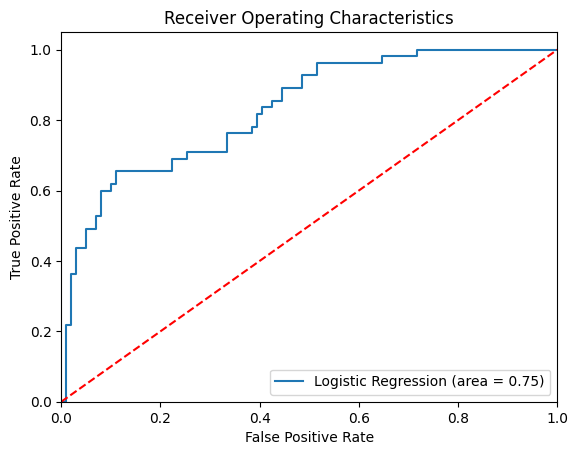

In [112]:
#displaying ROC curve
fpr,tpr,thresholds = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="Logistic Regression (area = %0.2f)"%logit_roc_auc)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc="lower right")
plt.show()

**Prediction with New Data**

In [ ]:
Pregnancies=int(input(" Pragnancy value between (1 to 20):"))
Glucose=int(input("( Gluecose between( 80 to 150):"))
BloodPressure=int(input("Bloodpressure between ( 10 to 100 ):"))
SkinThickness=int(input("Skinthickness between  ( 0 to 60):"))
Insulin=int(input("Insulin between ( 1 to 500) :"))
BMI=float(input("BMI Between ( 20.0 to 40.0):"))
DiabetesPedigreeFunction = float(input(" Diabetes Padigree value between (0.10 to 0.800):"))
Age=int(input("Age between  ( 15 to 60):"))

newx=[[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
       BMI, DiabetesPedigreeFunction, Age]]

newy = logmodel.predict(newx)

print("Your Chance of diabetes is: ",newy)
